# The Vanishing Gradient and Exploding Gradients Problem

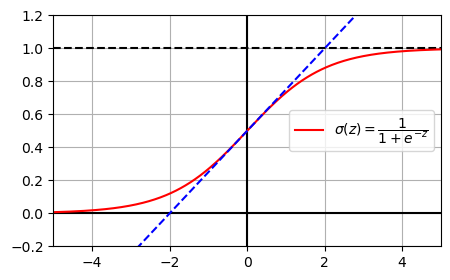

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

z=np.linspace(-5,5,400)

plt.figure(figsize=(5,3))
plt.plot([-5,5],[0,0],"k-")
plt.plot([-5,5],[1,1],"k--")
plt.plot([0,0],[-0.2,1.2],"k-")
plt.plot(z,sigmoid(z),"r",label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
plt.plot([-5,5],[-3/4,7/4],"b--")
plt.axis([-5,5,-0.2,1.2])
plt.legend()
plt.grid()
plt.show()

## Xavier and He Initialization

In [5]:
import tensorflow as tf

dense=tf.keras.layers.Dense(50,activation="relu",kernel_initializer="he_normal")

In [6]:
he_avg_init=tf.keras.initializers.VarianceScaling(scale=2,mode="fan_avg",distribution="uniform")
dense=tf.keras.layers.Dense(50,activation="relu",kernel_initializer=he_avg_init)

## Non-saturating Activation Functions

### ReLU

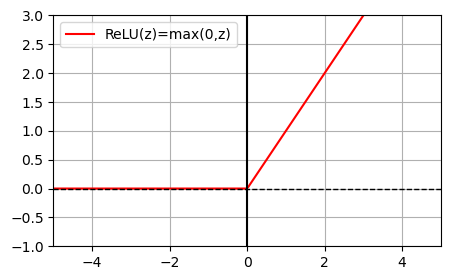

In [9]:
def relu(z):
    return np.maximum(0,z)
z=np.linspace(-5,5,200)

plt.figure(figsize=(5,3))
plt.plot(z,relu(z),"r-",label="ReLU(z)=max(0,z)")
plt.axis([-5,5,-1,3])
plt.plot([-5,5],[0,0],"k--",linewidth=1)
plt.plot([0,0],[-1,3],"k-")
plt.legend()
plt.grid()
plt.show()


### Leaky ReLU

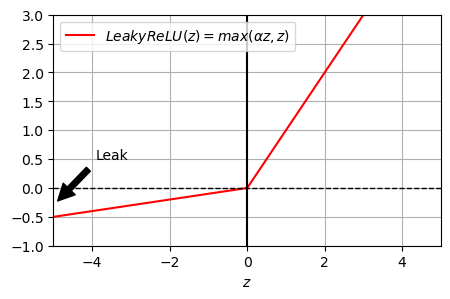

In [11]:
def leaky_relu(z,alpha):
    return np.maximum(alpha*z,z)

z=np.linspace(-5,5,200)

plt.figure(figsize=(5,3))
plt.plot(z,leaky_relu(z,0.1),"r-",label=r"$LeakyReLU(z)=max(\alpha z,z)$")
plt.axis([-5,5,-1,3])
plt.plot([-5,5],[0,0],"k--",linewidth=1)
plt.plot([0,0],[-1,3],"k-")
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=dict(color="black",shrink=0.1),
             fontsize=10, ha="center")
plt.xlabel("$z$")
plt.legend()
plt.grid()
plt.show()


In [12]:
leaky_relu=tf.keras.layers.LeakyReLU(negative_slope=0.2)
dense=tf.keras.layers.Dense(100,activation=leaky_relu,kernel_initializer="he_normal")

In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(negative_slope=0.1)
])

### ELU

In [15]:
dense=tf.keras.layers.Dense(200,activation="elu",
                           kernel_initializer="he_normal")

### SELU

In [17]:
dense=tf.keras.layers.Dense(200,activation="selu",
                           kernel_initializer="lecun_normal")


In [18]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [20]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[5000:],y_train_full[5000:]
X_valid,y_valid=X_train_full[:5000],y_train_full[:5000]
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [22]:
pixel_means=X_train.mean(axis=0,keepdims=True)
pixel_stds=X_train.std(axis=0,keepdims=True)
X_train_scaled=(X_train-pixel_means)/pixel_stds
X_valid_scaled=(X_valid-pixel_means)/pixel_stds
X_test_scaled=(X_test-pixel_means)/pixel_stds

In [23]:
history=model.fit(X_train_scaled,y_train,
                 epochs=5,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3499 - loss: 1.7623 - val_accuracy: 0.4836 - val_loss: 1.2770
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4689 - loss: 1.3385 - val_accuracy: 0.6462 - val_loss: 0.9755
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5963 - loss: 1.0434 - val_accuracy: 0.3442 - val_loss: 1.5624
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3592 - loss: 1.6172 - val_accuracy: 0.5012 - val_loss: 1.2126
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5878 - loss: 1.0663 - val_accuracy: 0.5672 - val_loss: 1.1108


In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [25]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [27]:
history=model.fit(X_train_scaled,y_train,
                 epochs=5,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1731 - loss: 2.1003 - val_accuracy: 0.3228 - val_loss: 1.7487
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3151 - loss: 1.7023 - val_accuracy: 0.4618 - val_loss: 1.3021
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4885 - loss: 1.2187 - val_accuracy: 0.5752 - val_loss: 0.9908
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5799 - loss: 1.0216 - val_accuracy: 0.6478 - val_loss: 0.9129
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6109 - loss: 0.9611 - val_accuracy: 0.6544 - val_loss: 0.8857


## Batch Normalization 

In [29]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [30]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [32]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [34]:
history=model.fit(X_train,y_train,
                 epochs=5,
                 validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5800 - loss: 1.2709 - val_accuracy: 0.8018 - val_loss: 0.5912
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7873 - loss: 0.6313 - val_accuracy: 0.8300 - val_loss: 0.5035
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8108 - loss: 0.5507 - val_accuracy: 0.8420 - val_loss: 0.4642
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8256 - loss: 0.5087 - val_accuracy: 0.8470 - val_loss: 0.4406
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8341 - loss: 0.4807 - val_accuracy: 0.8494 - val_loss: 0.4242


In [35]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [36]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [38]:
history=model.fit(X_train,y_train,
                 epochs=5,
                 validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.5293 - loss: 1.4508 - val_accuracy: 0.7750 - val_loss: 0.7106
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.7637 - loss: 0.7439 - val_accuracy: 0.8072 - val_loss: 0.5859
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.7931 - loss: 0.6357 - val_accuracy: 0.8274 - val_loss: 0.5274
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8086 - loss: 0.5792 - val_accuracy: 0.8376 - val_loss: 0.4914
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.8197 - loss: 0.5423 - val_accuracy: 0.8438 - val_loss: 0.4665


In [39]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [40]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [42]:
history=model.fit(X_train_scaled,y_train,
                 epochs=5,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.5059 - loss: 1.5300 - val_accuracy: 0.7742 - val_loss: 0.7540
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.7599 - loss: 0.7640 - val_accuracy: 0.8052 - val_loss: 0.6156
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.7905 - loss: 0.6475 - val_accuracy: 0.8208 - val_loss: 0.5517
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8052 - loss: 0.5873 - val_accuracy: 0.8300 - val_loss: 0.5129
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.8161 - loss: 0.5481 - val_accuracy: 0.8386 - val_loss: 0.4864


## Gradient Clipping

In [44]:
optimizer=tf.keras.optimizers.SGD(clipvalue=1)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer)

In [45]:
optimizer=tf.keras.optimizers.SGD(clipnorm=1)
model.compile(loss="sparse_categorical_crossentropy")

## Reusing Pretrained Models

In [47]:
pos_class_id=class_names.index('Pullover')
neg_class_id=class_names.index('T-shirt/top')

def split_dataset(X,y):
    y_for_B = (y==pos_class_id )|(y==neg_class_id)
    y_A = y[~y_for_B]
    y_B=(y[y_for_B]==pos_class_id).astype(np.float32)
    old_class_ids=list(set(range(10)) - set([neg_class_id,pos_class_id]))
    for old_class_id,new_class_id in zip(old_class_ids,range(8)):
        y_A[y_A==old_class_id]=new_class_id
    return ((X[~y_for_B],y_A),(X[y_for_B],y_B))
      

In [48]:
(X_train_A,y_train_A),(X_train_B,y_train_B)=split_dataset(X_train,y_train)
(X_valid_A,y_valid_A),(X_valid_B,y_valid_B)=split_dataset(X_valid,y_valid)
(X_test_A,y_test_A),(X_test_B,y_test_B)=split_dataset(X_test,y_test)

X_train_B=X_train_B[:200]
y_train_B=y_train_B[:200]

##### Train model_A

In [50]:
tf.random.set_seed(42)

model_A=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8,activation="softmax")

])

model_A.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
               metrics=["accuracy"])
history=model_A.fit(X_train_A,y_train_A,
                   epochs=20,
                   validation_data=(X_valid_A,y_valid_A))
model_A.save("model_A.keras")

Epoch 1/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.4768 - loss: 1.6040 - val_accuracy: 0.7720 - val_loss: 0.7281
Epoch 2/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.7922 - loss: 0.6678 - val_accuracy: 0.8344 - val_loss: 0.5250
Epoch 3/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.8376 - loss: 0.5081 - val_accuracy: 0.8576 - val_loss: 0.4472
Epoch 4/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.8573 - loss: 0.4392 - val_accuracy: 0.8693 - val_loss: 0.4019
Epoch 5/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.8681 - loss: 0.3980 - val_accuracy: 0.8784 - val_loss: 0.3714
Epoch 6/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8763 - loss: 0.3698 - val_accuracy: 0.8869 - val_loss: 0.3494
Epoch 7/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.8824 - loss: 0.3491 - val_accuracy: 0.8938 - val_loss: 0.3326
Epoch 8/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8869 -

##### Train model_B without reusing model_A

In [52]:
tf.random.set_seed(42)

model_B=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

model_B.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
               metrics=["accuracy"])
history=model_B.fit(X_train_B,y_train_B,
                   epochs=20,
                   validation_data=(X_valid_B,y_valid_B))
model_B.evaluate(X_test_B,y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7923 - loss: 0.5736 - val_accuracy: 0.8044 - val_loss: 0.5578
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8147 - loss: 0.5480 - val_accuracy: 0.8398 - val_loss: 0.5342
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8304 - loss: 0.5254 - val_accuracy: 0.8699 - val_loss: 0.5128
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8530 - loss: 0.5053 - val_accuracy: 0.8814 - val_loss: 0.4934
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8842 - loss: 0.4870 - val_accuracy: 0.8928 - val_loss: 0.4757
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8961 - loss: 0.4705 - val_accuracy: 0.9105 - val_loss: 0.4593
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8988 - loss: 0.4553 - val_accuracy: 0.9147 - val_loss: 0.4442
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9076 - loss: 0.4413 - val_accuracy: 0.9188 - val_loss: 0.4301
Epoch 9

[0.32982194423675537, 0.9210000038146973]

##### Train model_B using model_A

In [54]:
tf.random.set_seed(42)

In [55]:
model_A=tf.keras.models.load_model("model_A.keras")
model_A_clone=tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [56]:
model_B_on_A=tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [57]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=False

model_B_on_A.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [58]:
history=model_B_on_A.fit(X_train_B,y_train_B,
                        epochs=5,
                        validation_data=(X_valid_B,y_valid_B))

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5134 - loss: 0.8207 - val_accuracy: 0.4672 - val_loss: 0.7291
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5012 - loss: 0.7255 - val_accuracy: 0.5297 - val_loss: 0.6942
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5798 - loss: 0.7021 - val_accuracy: 0.5734 - val_loss: 0.6803
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6052 - loss: 0.6918 - val_accuracy: 0.5942 - val_loss: 0.6702
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6052 - loss: 0.6835 - val_accuracy: 0.6129 - val_loss: 0.6612


In [59]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=True

model_B_on_A.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])


In [60]:
history=model_B_on_A.fit(X_train_B,y_train_B,
                        epochs=15,
                        validation_data=(X_valid_B,y_valid_B))

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6351 - loss: 0.6673 - val_accuracy: 0.7180 - val_loss: 0.6165
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7023 - loss: 0.6235 - val_accuracy: 0.7919 - val_loss: 0.5754
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7603 - loss: 0.5840 - val_accuracy: 0.8293 - val_loss: 0.5398
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7779 - loss: 0.5505 - val_accuracy: 0.8522 - val_loss: 0.5081
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8228 - loss: 0.5206 - val_accuracy: 0.8751 - val_loss: 0.4801
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8488 - loss: 0.4940 - val_accuracy: 0.8887 - val_loss: 0.4551
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8488 - loss: 0.4699 - val_accuracy: 0.8970 - val_loss: 0.4331
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8683 - loss: 0.4488 - val_accuracy: 0.9011 - val_loss: 0.4137
Epoch 9

In [61]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9183 - loss: 0.3354


[0.3441074788570404, 0.9114999771118164]

In [62]:
1-(100-92.60)/(100-89.25)

0.3116279069767437

# Faster Optimizers

In [64]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=[28,28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10,activation="softmax")
    ])
    
def build_and_train_model(optimizer):
    model=build_model()
    model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=optimizer,
                 metrics=["accuracy"])
    return model.fit(X_train,y_train,
                    epochs=10,
                    validation_data=(X_valid,y_valid))   

In [65]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)

In [66]:
history_sgd=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.4444 - loss: 1.7346 - val_accuracy: 0.7268 - val_loss: 0.8477
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.7336 - loss: 0.8068 - val_accuracy: 0.7836 - val_loss: 0.6655
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.7752 - loss: 0.6624 - val_accuracy: 0.8064 - val_loss: 0.5887
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7949 - loss: 0.5945 - val_accuracy: 0.8210 - val_loss: 0.5459
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.8073 - loss: 0.5542 - val_accuracy: 0.8290 - val_loss: 0.5177
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.8165 - loss: 0.5265 - val_accuracy: 0.8328 - val_loss: 0.4971
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.8224 - loss: 0.5060 - val_accuracy: 0.8384 - val_loss: 0.4817
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.8284 -

## Momentum Optimization

In [68]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)

In [69]:
history_momentum=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 760us/step - accuracy: 0.6656 - loss: 1.0001 - val_accuracy: 0.8328 - val_loss: 0.4811
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.8295 - loss: 0.4817 - val_accuracy: 0.8510 - val_loss: 0.4275
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.8470 - loss: 0.4288 - val_accuracy: 0.8596 - val_loss: 0.3967
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.8584 - loss: 0.3987 - val_accuracy: 0.8636 - val_loss: 0.3793
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.8662 - loss: 0.3773 - val_accuracy: 0.8704 - val_loss: 0.3668
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.8721 - loss: 0.3606 - val_accuracy: 0.8736 - val_loss: 0.3565
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.8754 - loss: 0.3465 - val_accuracy: 0.8782 - val_loss: 0.3500
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.8799 -

## Nesterov Accelerated Gradients

In [71]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,
                                 nesterov=True)

In [72]:
history_nesterov=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.6649 - loss: 0.9893 - val_accuracy: 0.8380 - val_loss: 0.4663
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.8313 - loss: 0.4707 - val_accuracy: 0.8570 - val_loss: 0.4125
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.8496 - loss: 0.4220 - val_accuracy: 0.8642 - val_loss: 0.3876
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.8584 - loss: 0.3942 - val_accuracy: 0.8692 - val_loss: 0.3712
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.8653 - loss: 0.3745 - val_accuracy: 0.8720 - val_loss: 0.3620
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.8709 - loss: 0.3589 - val_accuracy: 0.8756 - val_loss: 0.3540
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.8749 - loss: 0.3460 - val_accuracy: 0.8774 - val_loss: 0.3464
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.8789 -

## AdaGrad

In [74]:
optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [75]:
history_adagrad=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 786us/step - accuracy: 0.5417 - loss: 1.4501 - val_accuracy: 0.7690 - val_loss: 0.7017
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.7740 - loss: 0.6759 - val_accuracy: 0.7992 - val_loss: 0.5982
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.8013 - loss: 0.5893 - val_accuracy: 0.8132 - val_loss: 0.5522
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.8155 - loss: 0.5471 - val_accuracy: 0.8216 - val_loss: 0.5245
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.8243 - loss: 0.5205 - val_accuracy: 0.8256 - val_loss: 0.5053
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.8298 - loss: 0.5019 - val_accuracy: 0.8296 - val_loss: 0.4912
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.8341 - loss: 0.4878 - val_accuracy: 0.8350 - val_loss: 0.4800
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.8382 -

## RMSProp

In [77]:
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)

In [78]:
history_rmsprop=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.7643 - loss: 0.6555 - val_accuracy: 0.8448 - val_loss: 0.4570
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.8535 - loss: 0.4029 - val_accuracy: 0.8482 - val_loss: 0.4226
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8686 - loss: 0.3696 - val_accuracy: 0.8556 - val_loss: 0.4251
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.8734 - loss: 0.3576 - val_accuracy: 0.8568 - val_loss: 0.4365
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.8784 - loss: 0.3462 - val_accuracy: 0.8640 - val_loss: 0.4245
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.8792 - loss: 0.3464 - val_accuracy: 0.8524 - val_loss: 0.4715
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.8816 - loss: 0.3401 - val_accuracy: 0.8516 - val_loss: 0.4902
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.8838 -

## Adam Optimization

In [80]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [81]:
history_adam=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.7703 - loss: 0.6438 - val_accuracy: 0.8624 - val_loss: 0.3764
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8548 - loss: 0.3904 - val_accuracy: 0.8694 - val_loss: 0.3565
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.8741 - loss: 0.3429 - val_accuracy: 0.8802 - val_loss: 0.3295
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.8830 - loss: 0.3152 - val_accuracy: 0.8798 - val_loss: 0.3238
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.8880 - loss: 0.2992 - val_accuracy: 0.8870 - val_loss: 0.3156
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.8942 - loss: 0.2825 - val_accuracy: 0.8878 - val_loss: 0.3230
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.8993 - loss: 0.2691 - val_accuracy: 0.8842 - val_loss: 0.3347
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.9033 -

### Adamax optimization

In [83]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [84]:
history_adamax=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.7582 - loss: 0.6865 - val_accuracy: 0.8606 - val_loss: 0.3886
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.8554 - loss: 0.3992 - val_accuracy: 0.8756 - val_loss: 0.3553
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.8728 - loss: 0.3525 - val_accuracy: 0.8792 - val_loss: 0.3416
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8812 - loss: 0.3258 - val_accuracy: 0.8806 - val_loss: 0.3356
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.8882 - loss: 0.3072 - val_accuracy: 0.8812 - val_loss: 0.3289
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.8955 - loss: 0.2903 - val_accuracy: 0.8868 - val_loss: 0.3199
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.8999 - loss: 0.2765 - val_accuracy: 0.8906 - val_loss: 0.3180
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.9038 -

### Nadam Optimizer

In [86]:
optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [87]:
history_nadam=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7826 - loss: 0.6198 - val_accuracy: 0.8672 - val_loss: 0.3691
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8627 - loss: 0.3771 - val_accuracy: 0.8754 - val_loss: 0.3382
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8766 - loss: 0.3372 - val_accuracy: 0.8858 - val_loss: 0.3229
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8835 - loss: 0.3141 - val_accuracy: 0.8852 - val_loss: 0.3241
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8915 - loss: 0.2930 - val_accuracy: 0.8828 - val_loss: 0.3282
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8970 - loss: 0.2767 - val_accuracy: 0.8850 - val_loss: 0.3246
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9011 - loss: 0.2653 - val_accuracy: 0.8874 - val_loss: 0.3335
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9055 - loss: 0.2542 - 

### AdamW Optimizer

In [89]:
optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001,weight_decay=1e-5,
                                   beta_1=0.9,beta_2=0.99)

In [90]:
history_adamw=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.7709 - loss: 0.6353 - val_accuracy: 0.8674 - val_loss: 0.3718
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.8561 - loss: 0.3921 - val_accuracy: 0.8774 - val_loss: 0.3530
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.8722 - loss: 0.3484 - val_accuracy: 0.8844 - val_loss: 0.3303
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.8816 - loss: 0.3192 - val_accuracy: 0.8796 - val_loss: 0.3321
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.8884 - loss: 0.2990 - val_accuracy: 0.8840 - val_loss: 0.3257
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.8956 - loss: 0.2830 - val_accuracy: 0.8888 - val_loss: 0.3301
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.9003 - loss: 0.2694 - val_accuracy: 0.8898 - val_loss: 0.3268
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.9033 -

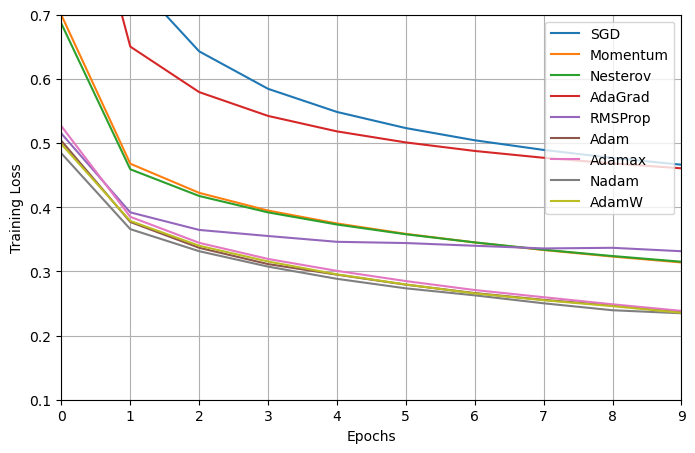

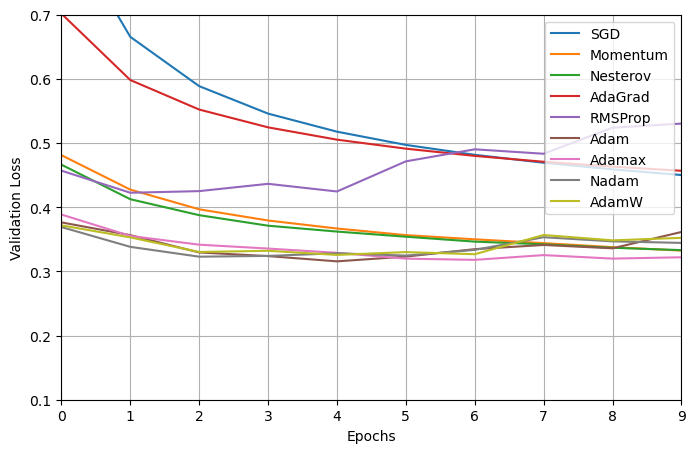

In [91]:
for loss in ("loss","val_loss"):
    plt.figure(figsize=(8, 5))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history,opt_name in zip((history_sgd,history_momentum,history_nesterov,history_adagrad,
                                history_rmsprop,history_adam,history_adamax,history_nadam,
                                history_adamw),opt_names.split()):
        plt.plot(history.history[loss],label=f"{opt_name}")

    plt.grid()
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel({"loss":"Training Loss","val_loss":"Validation Loss"}[loss])
    plt.axis([0, 9, 0.1, 0.7])
    plt.show
        
    

## Learning Rate Scheduling

## Power Scheduling

In [94]:
lr_schedule=tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=1,
    staircase=False
)
optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [95]:
history_power_scheduling=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.6735 - loss: 0.9680 - val_accuracy: 0.8122 - val_loss: 0.5350
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.8272 - loss: 0.4855 - val_accuracy: 0.8416 - val_loss: 0.4468
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.8461 - loss: 0.4342 - val_accuracy: 0.8544 - val_loss: 0.4091
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.8558 - loss: 0.4059 - val_accuracy: 0.8622 - val_loss: 0.3891
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.8615 - loss: 0.3867 - val_accuracy: 0.8658 - val_loss: 0.3760
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.8663 - loss: 0.3725 - val_accuracy: 0.8684 - val_loss: 0.3677
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.8697 - loss: 0.3615 - val_accuracy: 0.8700 - val_loss: 0.3603
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.8727 -

In [96]:
optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule,beta_1=0.9,beta_2=0.999)

In [97]:
history_adam_power_scheduling=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.7340 - loss: 0.7384 - val_accuracy: 0.8424 - val_loss: 0.4463
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.8308 - loss: 0.4683 - val_accuracy: 0.8574 - val_loss: 0.4254
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.8432 - loss: 0.4310 - val_accuracy: 0.8602 - val_loss: 0.4041
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.8548 - loss: 0.4040 - val_accuracy: 0.8592 - val_loss: 0.3944
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.8617 - loss: 0.3817 - val_accuracy: 0.8696 - val_loss: 0.3726
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.8669 - loss: 0.3621 - val_accuracy: 0.8694 - val_loss: 0.3798
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.8702 - loss: 0.3515 - val_accuracy: 0.8698 - val_loss: 0.3809
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.8726 -

In [98]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [99]:
history_adamax_power_scheduling=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.7519 - loss: 0.7034 - val_accuracy: 0.8626 - val_loss: 0.3855
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.8550 - loss: 0.4000 - val_accuracy: 0.8760 - val_loss: 0.3481
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8698 - loss: 0.3538 - val_accuracy: 0.8750 - val_loss: 0.3400
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.8809 - loss: 0.3265 - val_accuracy: 0.8850 - val_loss: 0.3213
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.8887 - loss: 0.3063 - val_accuracy: 0.8864 - val_loss: 0.3148
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.8933 - loss: 0.2913 - val_accuracy: 0.8880 - val_loss: 0.3045
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.8981 - loss: 0.2756 - val_accuracy: 0.8886 - val_loss: 0.3169
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.9031 -

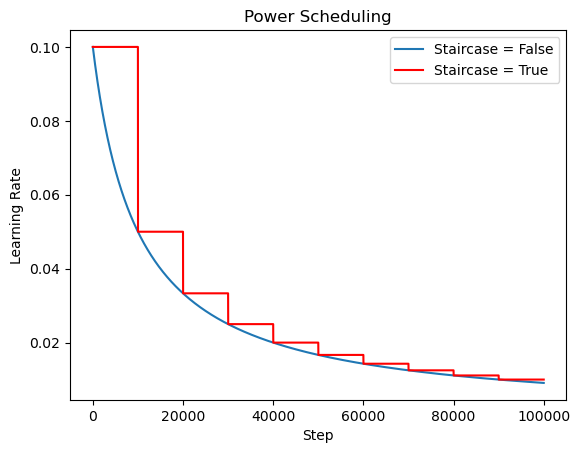

In [100]:
initial_learning_rate=0.1
decay_steps=10000
decay_rate=1

steps=np.arange(100000)
lrs=initial_learning_rate/(1+decay_rate*steps/decay_steps)
lrs2=initial_learning_rate/(1+decay_rate*np.floor(steps/decay_steps))

plt.plot(steps,lrs,"-",label="Staircase = False")
plt.plot(steps,lrs2,"r-",label="Staircase = True")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling")
plt.legend()
plt.show()

## Exponential Scheduling

In [102]:
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_rate=0.1,
    decay_steps=20000,
    staircase=False
)
optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [103]:
history_exponential_scheduling=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.6742 - loss: 0.9724 - val_accuracy: 0.8166 - val_loss: 0.5187
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.8278 - loss: 0.4832 - val_accuracy: 0.8460 - val_loss: 0.4340
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8471 - loss: 0.4289 - val_accuracy: 0.8572 - val_loss: 0.3988
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.8569 - loss: 0.4003 - val_accuracy: 0.8652 - val_loss: 0.3804
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.8635 - loss: 0.3819 - val_accuracy: 0.8688 - val_loss: 0.3694
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8681 - loss: 0.3691 - val_accuracy: 0.8716 - val_loss: 0.3619
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.8717 - loss: 0.3597 - val_accuracy: 0.8726 - val_loss: 0.3574
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.8749 -

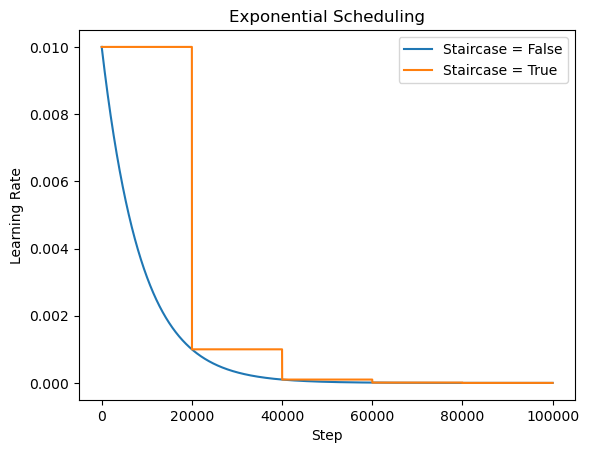

In [104]:
initial_learning_rate=0.01
decay_steps=20000
decay_rate=0.1

steps=np.arange(100000)
lrs=initial_learning_rate*decay_rate**(steps/decay_steps)
lrs2=initial_learning_rate*decay_rate**np.floor(steps/decay_steps)
plt.plot(steps,lrs,"-",label="Staircase = False")
plt.plot(steps,lrs2,"-",label="Staircase = True")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling")
plt.legend()
plt.show()

In [105]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0*0.1**(epoch/s)
    return exponential_decay_fn

exponential_decay_fn=exponential_decay(lr0=0.01,s=20)

In [106]:
tf.random.set_seed(42)

model=build_model()
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [107]:
lr_scheduler_cb=tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history=model.fit(X_train,y_train,
                 epochs=20,
                 validation_data=(X_valid,y_valid),
                 callbacks=[lr_scheduler_cb])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.6753 - loss: 0.9468 - val_accuracy: 0.8162 - val_loss: 0.5400 - learning_rate: 0.0100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.8279 - loss: 0.4850 - val_accuracy: 0.8472 - val_loss: 0.4509 - learning_rate: 0.0089
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.8452 - loss: 0.4313 - val_accuracy: 0.8602 - val_loss: 0.4112 - learning_rate: 0.0079
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8560 - loss: 0.4022 - val_accuracy: 0.8666 - val_loss: 0.3883 - learning_rate: 0.0071
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.8630 - loss: 0.3824 - val_accuracy: 0.8706 - val_loss: 0.3744 - learning_rate: 0.0063
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.8676 - loss: 0.3676 - val_accuracy: 0.8730 - val_loss: 0.3649 - learning_rate: 0.0056
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accura

In [197]:
class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self,initial_lr,decay_rate,decay_steps):
        super().__init__()
        self.initial_lr=initial_lr
        self.decay_rate=decay_rate
        self.decay_steps=decay_steps
        self.step=0

    def on_batch_begin(self,batch,logs=None):
        self.step+=1
        new_lr=self.initial_lr*(self.decay_rate**(self.step/self.decay_steps))
        self.model.optimizer.learning_rate.assign(new_lr)
    def on_epoch_end(self,epoch,logs=None):
        logs=logs or {}
        logs['lr']=self.model.optimizer.learning_rate.numpy()

In [199]:
import math

lr0=0.01
model=build_model()
optimizer=tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [201]:
batch_size=32
n_epochs=20
decay_steps=n_epochs*math.ceil(len(X_train)/batch_size)
exp_decay=ExponentialDecay(initial_lr=lr0,decay_rate=0.1,decay_steps=decay_steps)

In [203]:
history=model.fit(
    X_train,y_train,
    epochs=n_epochs,
    validation_data=(X_valid,y_valid),
    callbacks=[exp_decay]
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.6741 - loss: 0.9876 - val_accuracy: 0.8190 - val_loss: 0.5260 - lr: 0.0089
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.8277 - loss: 0.4845 - val_accuracy: 0.8440 - val_loss: 0.4539 - lr: 0.0079
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.8461 - loss: 0.4317 - val_accuracy: 0.8558 - val_loss: 0.4175 - lr: 0.0071
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.8557 - loss: 0.4032 - val_accuracy: 0.8650 - val_loss: 0.3981 - lr: 0.0063
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.8616 - loss: 0.3843 - val_accuracy: 0.8666 - val_loss: 0.3821 - lr: 0.0056
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.8660 - loss: 0.3703 - val_accuracy: 0.8696 - val_loss: 0.3701 - lr: 0.0050
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.8702 - loss: 0.3593 - val_accuracy: 0.8732 - val_loss: 0.362